<a href="https://colab.research.google.com/github/amirrahimi8222/Artificial_Inteligence/blob/main/heart_diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

پروژه تشخیص و تخمین درصد ابتلا به بیماری قلبی

# پیش نیاز ها

بهمن ماه 1403 درس مبانی سیستم های هوشمند

In [ ]:
!gdown  11eTS3XXL9E4Iv08tI3WPj-r9XMpjDCOI

Downloading...
From: https://drive.google.com/uc?id=11eTS3XXL9E4Iv08tI3WPj-r9XMpjDCOI
To: /content/dataset (1) (1).csv
100% 11.0k/11.0k [00:00<00:00, 18.3MB/s]


******************************************************************************

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load dataset
file_path = "/content/dataset (1).csv"
df = pd.read_csv(file_path)

# Display dataset info
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187   

In [ ]:
# Check for null values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


There is no null value

Total number of records in the dataset: 303


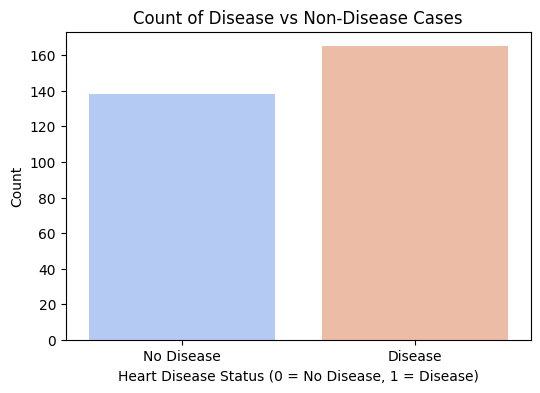

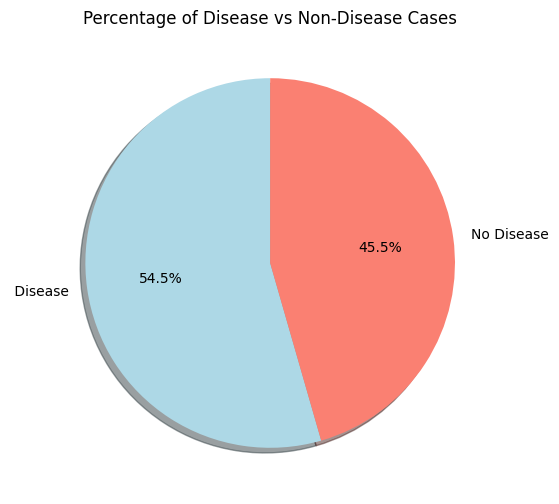

In [ ]:
print(f"Total number of records in the dataset: {df.shape[0]}")
# Plot distribution of disease vs non-disease examples
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], palette='coolwarm')
plt.title("Count of Disease vs Non-Disease Cases")
plt.xlabel("Heart Disease Status (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No Disease', 'Disease'])
plt.show()
# Pie chart for disease vs non-disease distribution
plt.figure(figsize=(6,6))
labels = [' Disease', 'No Disease']
colors = ['lightblue', 'salmon']
plt.pie(df['target'].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title("Percentage of Disease vs Non-Disease Cases")
plt.show()


In [ ]:
# Compute correlation matrix and covariance matrix
correlation_matrix = df.corr()
covariance_matrix = df.cov()

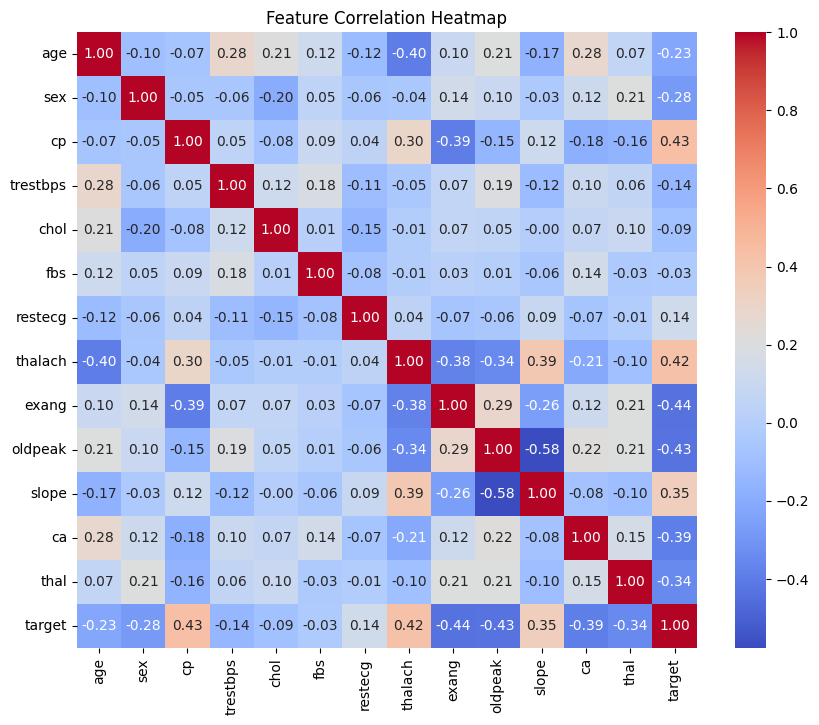

In [ ]:
# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

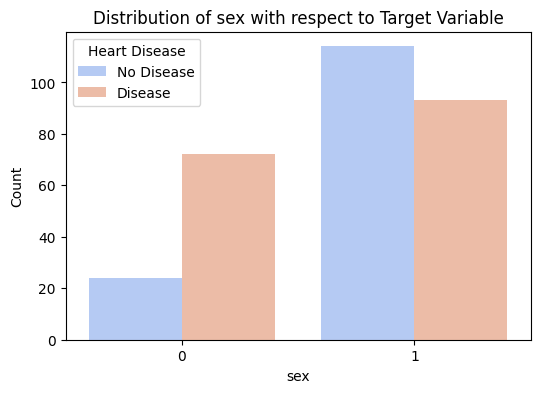

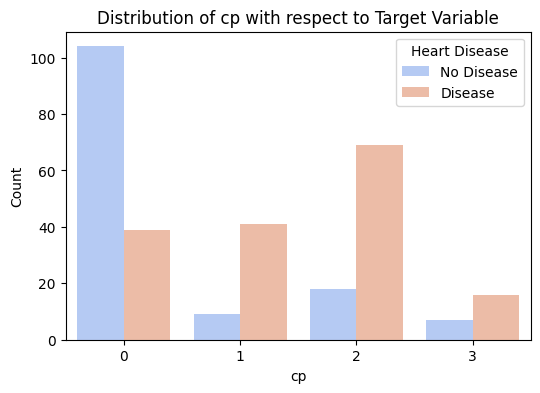

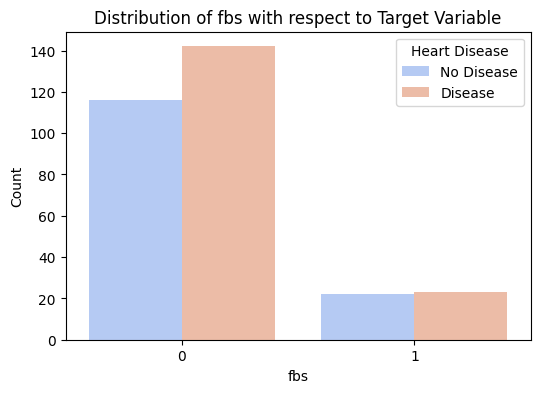

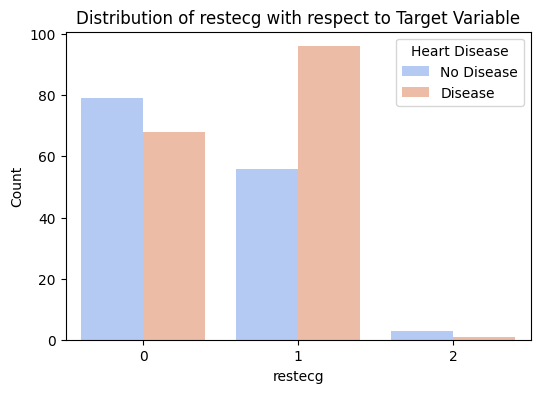

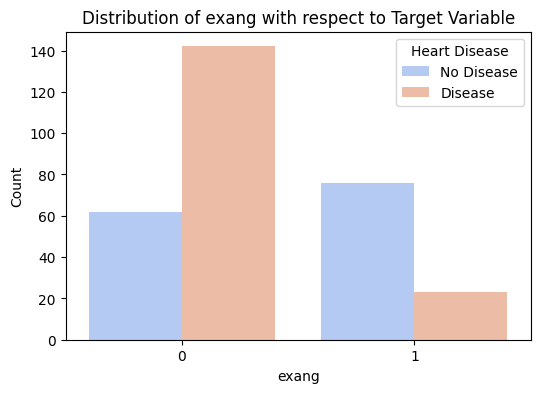

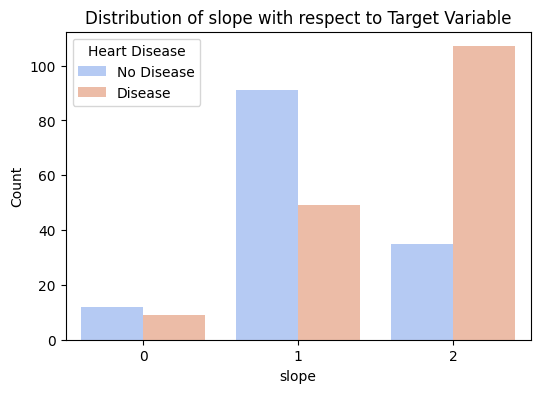

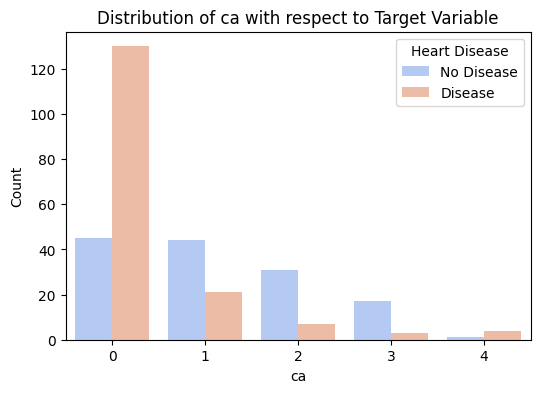

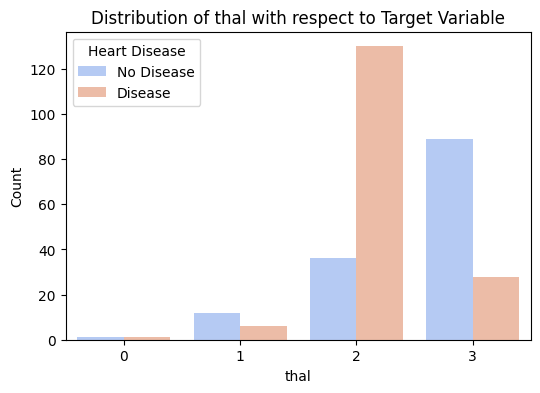

In [ ]:

# Analyze categorical variables in conjunction with target variable
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[feature], hue=df['target'], palette='coolwarm')
    plt.title(f"Distribution of {feature} with respect to Target Variable")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
    plt.show()

In [ ]:

# LOGESTIC CONFUSION MATRIX
logistic_conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(logistic_conf_matrix)



Confusion Matrix:
[[16 14]
 [ 3 28]]


Sensitivity (TPR): 0.9032
Specificity (TNR): 0.5333


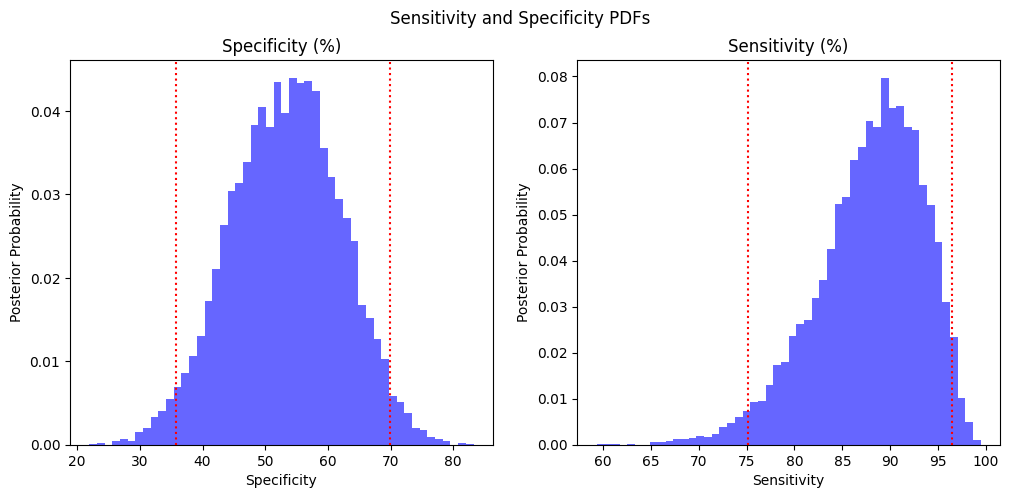

Sensitivity mode = 88.6, 95% CI: (75.1, 96.5)
Specificity mode = 53.5, 95% CI: (35.8, 69.8)


In [ ]:

# Compute Sensitivity and Specificity
TP = logistic_conf_matrix[1, 1]  # True Positives
FN = logistic_conf_matrix[1, 0]  # False Negatives
TN = logistic_conf_matrix[0, 0]  # True Negatives
FP = logistic_conf_matrix[0, 1]  # False Positives

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")

# Bayesian estimation of sensitivity and specificity
samples = 10000
sens_samples = np.random.beta(TP + 1, FN + 1, size=samples) * 100
spec_samples = np.random.beta(TN + 1, FP + 1, size=samples) * 100

# Plot Bayesian Distributions
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(spec_samples, bins=50, density=True, alpha=0.6, color='blue')
ax[0].axvline(np.percentile(spec_samples, 2.5), linestyle='dotted', color='red')
ax[0].axvline(np.percentile(spec_samples, 97.5), linestyle='dotted', color='red')
ax[0].set_title("Specificity (%)")
ax[0].set_xlabel("Specificity")
ax[0].set_ylabel("Posterior Probability")

ax[1].hist(sens_samples, bins=50, density=True, alpha=0.6, color='blue')
ax[1].axvline(np.percentile(sens_samples, 2.5), linestyle='dotted', color='red')
ax[1].axvline(np.percentile(sens_samples, 97.5), linestyle='dotted', color='red')
ax[1].set_title("Sensitivity (%)")
ax[1].set_xlabel("Sensitivity")
ax[1].set_ylabel("Posterior Probability")

plt.suptitle("Sensitivity and Specificity PDFs")
plt.show()

# Print confidence intervals
sens_ci = (np.percentile(sens_samples, 2.5), np.percentile(sens_samples, 97.5))
spec_ci = (np.percentile(spec_samples, 2.5), np.percentile(spec_samples, 97.5))
print(f"Sensitivity mode = {np.median(sens_samples):.1f}, 95% CI: ({sens_ci[0]:.1f}, {sens_ci[1]:.1f})")
print(f"Specificity mode = {np.median(spec_samples):.1f}, 95% CI: ({spec_ci[0]:.1f}, {spec_ci[1]:.1f})")


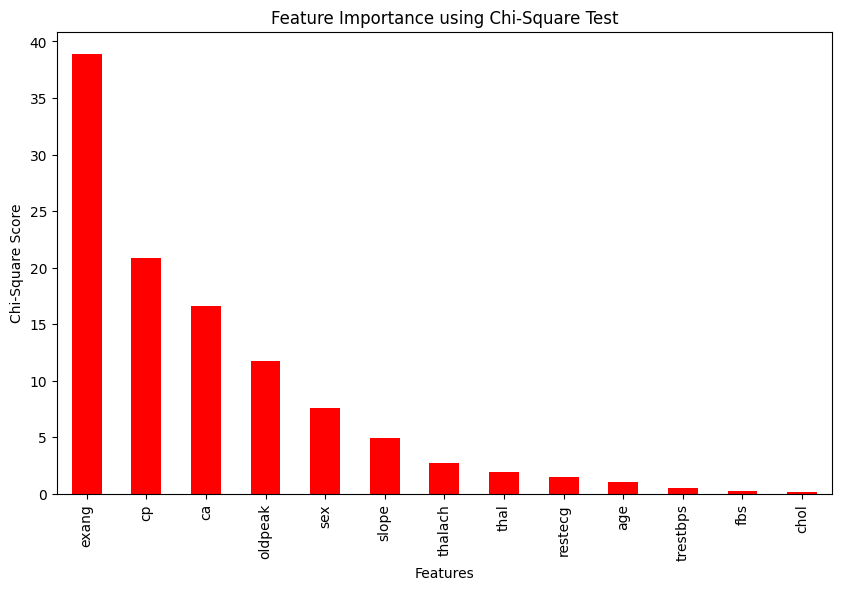

In [ ]:
# Feature Importance using Chi-Square Test
X = df.drop(columns=['target'])
y = df['target']

# Normalizing data for chi-square test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Compute Chi-Square scores
chi_scores, _ = chi2(X_scaled, y)

# Display feature importance
feature_importance = pd.Series(chi_scores, index=X.columns)
plt.figure(figsize=(10,6))
feature_importance.sort_values(ascending=False).plot(kind='bar', color='red')
plt.title("Feature Importance using Chi-Square Test")
plt.xlabel("Features")
plt.ylabel("Chi-Square Score")
plt.show()

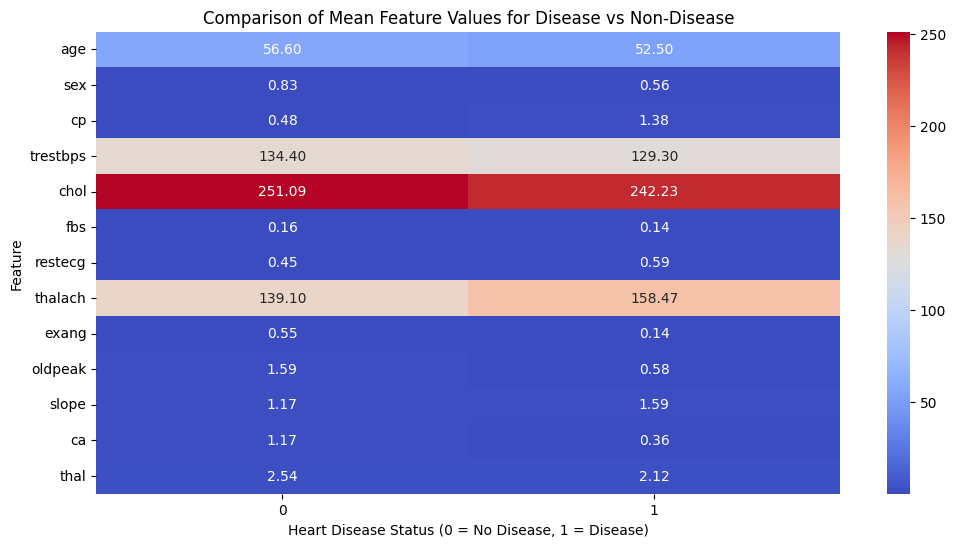

In [ ]:
# Compare mean of each feature for disease vs non-disease
mean_comparison = df.groupby('target').mean()
plt.figure(figsize=(12,6))
sns.heatmap(mean_comparison.T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Comparison of Mean Feature Values for Disease vs Non-Disease")
plt.xlabel("Heart Disease Status (0 = No Disease, 1 = Disease)")
plt.ylabel("Feature")
plt.show()

# اموزش مدل ها

In [ ]:
# Split features and target
X = df.drop(columns=['target'])
y = df['target']

In [ ]:

# Split into training and testing sets
np.random.seed(63)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)


In [ ]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, title):
    plt.figure(figsize=(6,5))
    plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted')
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.title(title)
    plt.legend()
    plt.show()

TRAIN THE NETWORK WITH DIFFERENT ALGORITHMS

In [ ]:
# Train MLP Model
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=63)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_report = classification_report(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_accuracy)
print("MLP Classification Report:\n", mlp_report)

MLP Accuracy: 0.819672131147541
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



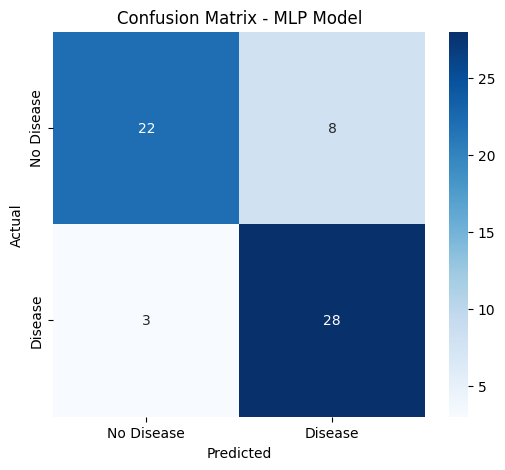

In [ ]:
# Plot Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Model")
plt.show()

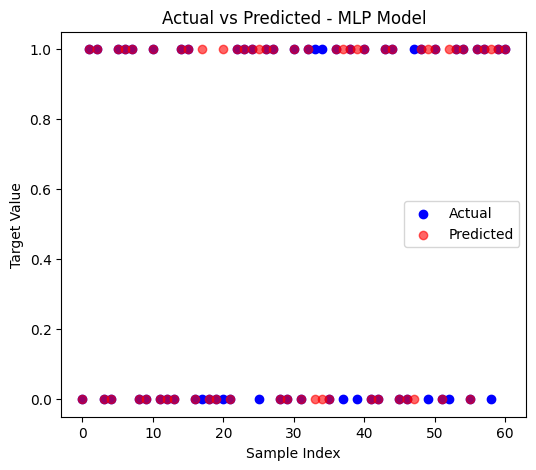

In [ ]:
# Plot for MLP
plot_actual_vs_predicted(y_test, y_pred_mlp, "Actual vs Predicted - MLP Model")

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='rbf', probability=True, random_state=63)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", svm_report)

SVM Accuracy: 0.7213114754098361
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.67      0.90      0.77        31

    accuracy                           0.72        61
   macro avg       0.75      0.72      0.71        61
weighted avg       0.75      0.72      0.71        61



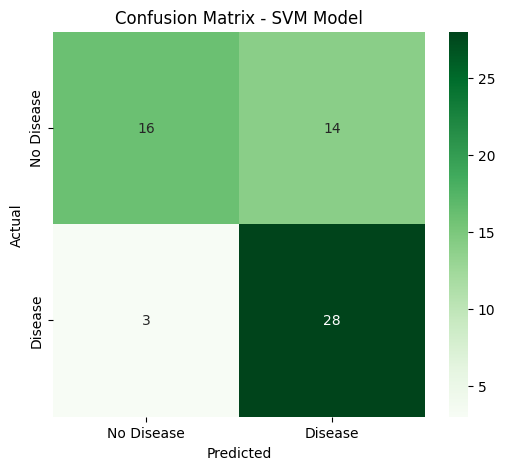

In [ ]:
# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")
plt.show()

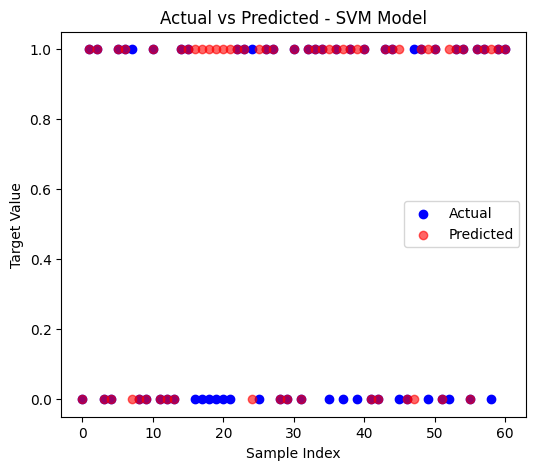

In [ ]:
# Plot for SVM
plot_actual_vs_predicted(y_test, y_pred_svm, "Actual vs Predicted - SVM Model")

In [ ]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=63)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Accuracy: 0.8032786885245902
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        30
           1       0.81      0.81      0.81        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



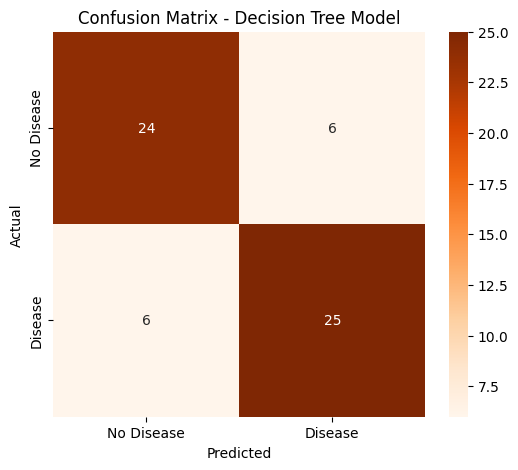

In [ ]:
# Plot Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree Model")
plt.show()


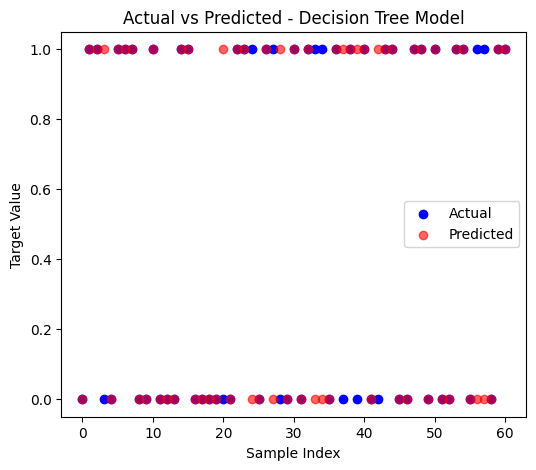

In [ ]:
# Plot for Decision Tree
plot_actual_vs_predicted(y_test, y_pred_dt, "Actual vs Predicted - Decision Tree Model")

# ارزیابی مدل

MLP - MSE: 0.1803, RMSE: 0.4247, R²: 0.2785, ROC AUC: 0.9075
Decision Tree - MSE: 0.1967, RMSE: 0.4435, R²: 0.2129, ROC AUC: 0.8032
SVM - MSE: 0.2787, RMSE: 0.5279, R²: -0.1151, ROC AUC: 0.8151
Best model selected: MLP


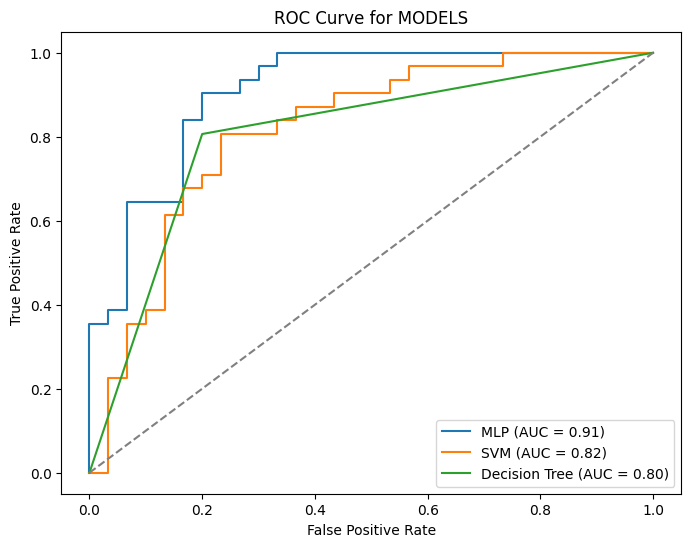

In [ ]:

# Define models
models = {
    "MLP": MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=63),
    "Decision Tree": DecisionTreeClassifier(random_state=63),
    "SVM": SVC(kernel='rbf', probability=True, random_state=63),

}

# Evaluate models
mse_scores = {}
rmse_scores = {}
r2_scores = {}
roc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else np.zeros_like(y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    mse_scores[name] = mse
    rmse_scores[name] = rmse
    r2_scores[name] = r2
    roc_scores[name] = roc_auc
    print(f"{name} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, ROC AUC: {roc_auc:.4f}")

# Normalize MSE, RMSE, R², and ROC AUC
mse_min, mse_max = min(mse_scores.values()), max(mse_scores.values())
mse_scores_normalized = {k: (v - mse_min) / (mse_max - mse_min) for k, v in mse_scores.items()}

rmse_min, rmse_max = min(rmse_scores.values()), max(rmse_scores.values())
rmse_scores_normalized = {k: (v - rmse_min) / (rmse_max - rmse_min) for k, v in rmse_scores.items()}

r2_min, r2_max = min(r2_scores.values()), max(r2_scores.values())
r2_scores_normalized = {k: (v - r2_min) / (r2_max - r2_min) for k, v in r2_scores.items()}

roc_min, roc_max = min(roc_scores.values()), max(roc_scores.values())
roc_scores_normalized = {k: (v - roc_min) / (roc_max - roc_min) for k, v in roc_scores.items()}

# Compute final score (weighted average of all metrics)
final_scores = {k: (mse_scores_normalized[k] + rmse_scores_normalized[k] - r2_scores_normalized[k] - roc_scores_normalized[k]) / 4 for k in models.keys()}

# Select best model
best_model_name = min(final_scores, key=final_scores.get)
best_model = models[best_model_name]
print(f"Best model selected: {best_model_name}")

# Retrain best model on full dataset
best_model.fit(X_train, y_train)

# Plot ROC Curves
plt.figure(figsize=(8,6))
for name in ["MLP", "SVM","Decision Tree"]:
    if name in models:
        fpr, tpr, _ = roc_curve(y_test, models[name].predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_scores[name]:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MODELS")
plt.legend()
plt.show()


#  تحلیل و انالیز فازی

In [ ]:
# بهترین مدل از مرحله قبل
best_model = models[best_model_name]  # مطمئن شوید که این مقدار قبلاً در کد مشخص شده است

# دریافت ورودی کاربر
features = {
    'age': 'Age (years, typically 20-80): ',
    'sex': 'Sex (1=Male, 0=Female): ',
    'cp': 'Chest Pain Type (0-3): ',
    'trestbps': 'Resting Blood Pressure (mm Hg, typically 90-200): ',
    'chol': 'Serum Cholesterol (mg/dl, typically 100-400): ',
    'fbs': 'Fasting Blood Sugar (1 if >120 mg/dl, else 0): ',
    'restecg': 'Resting Electrocardiographic Results (0-2): ',
    'thalach': 'Maximum Heart Rate Achieved (typically 70-210): ',
    'exang': 'Exercise Induced Angina (1=Yes, 0=No): ',
    'oldpeak': 'ST Depression Induced by Exercise (typically 0-7): ',
    'slope': 'Slope of Peak Exercise ST Segment (0-2): ',
    'ca': 'Number of Major Vessels Colored by Fluoroscopy (0-4): ',
    'thal': 'Thalassemia Type (1-3): '
}

user_inputs = {}
print("Please enter the following values:")
for feature, prompt in features.items():
    user_inputs[feature] = float(input(prompt))

# تبدیل ورودی کاربر به فرمت مناسب برای مدل یادگیری ماشین
user_data = np.array([user_inputs[feature] for feature in features]).reshape(1, -1)

# استانداردسازی داده‌ها برای استفاده در مدل
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
user_data_scaled = scaler.transform(user_data)

# پیش‌بینی احتمال ابتلا با بهترین مدل
predicted_proba = best_model.predict_proba(user_data_scaled)[:, 1][0]  # مقدار صحیح

# تعریف سیستم فازی برای اصلاح احتمال
variables = {feature: ctrl.Antecedent(np.linspace(df[feature].min(), df[feature].max(), 100), feature) for feature in features}
predicted_risk = ctrl.Antecedent(np.linspace(0, 1, 100), 'predicted_risk')  # اضافه کردن ورودی جدید

probability = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'probability')

# تعریف توابع عضویت
for var in variables.values():
    var.automf(3)

predicted_risk['low'] = fuzz.trimf(predicted_risk.universe, [0, 0, 0.5])
predicted_risk['medium'] = fuzz.trimf(predicted_risk.universe, [0.2, 0.5, 0.8])
predicted_risk['high'] = fuzz.trimf(predicted_risk.universe, [0.5, 1, 1])

probability['low'] = fuzz.trimf(probability.universe, [0, 0, 0.5])
probability['medium'] = fuzz.trimf(probability.universe, [0.2, 0.5, 0.8])
probability['high'] = fuzz.trimf(probability.universe, [0.5, 1, 1])

# تعریف قوانین فازی
rules = [
    ctrl.Rule(predicted_risk['low'], probability['low']),
    ctrl.Rule(predicted_risk['medium'], probability['medium']),
    ctrl.Rule(predicted_risk['high'], probability['high'])
]

# سیستم کنترل فازی
prob_ctrl = ctrl.ControlSystem(rules)
prob_simulation = ctrl.ControlSystemSimulation(prob_ctrl)

# تنظیم مقدار پیش‌بینی شده‌ی مدل به‌عنوان ورودی سیستم فازی
prob_simulation.input['predicted_risk'] = predicted_proba
prob_simulation.compute()
prob_result = prob_simulation.output['probability']

# توصیه براساس مقدار نهایی احتمال
if prob_result < 0.3:
    recommendation = "Your risk of heart disease is low. Maintain a healthy lifestyle with regular exercise and a balanced diet."
elif prob_result < 0.7:
    recommendation = "Your risk of heart disease is moderate. Consider consulting a doctor and monitoring your health regularly."
else:
    recommendation = "Your risk of heart disease is high. It is strongly recommended to visit a healthcare professional as soon as possible."

print(f"Based on the provided values, the probability of heart disease is: {prob_result * 100:.2f}%")
print(f"Recommendation: {recommendation}")


Please enter the following values:
Age (years, typically 20-80): 54
Sex (1=Male, 0=Female): 1
Chest Pain Type (0-3): 0
Resting Blood Pressure (mm Hg, typically 90-200): 122
Serum Cholesterol (mg/dl, typically 100-400): 286
Fasting Blood Sugar (1 if >120 mg/dl, else 0): 0
Resting Electrocardiographic Results (0-2): 0
Maximum Heart Rate Achieved (typically 70-210): 116
Exercise Induced Angina (1=Yes, 0=No): 1
ST Depression Induced by Exercise (typically 0-7): 3.2
Slope of Peak Exercise ST Segment (0-2): 1
Number of Major Vessels Colored by Fluoroscopy (0-4): 2
Thalassemia Type (1-3): 2
Based on the provided values, the probability of heart disease is: 17.45%
Recommendation: Your risk of heart disease is low. Maintain a healthy lifestyle with regular exercise and a balanced diet.
